## Sales Prediction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## Data Analysis

In [3]:
# Remove the 'Unnamed: 0' column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.shape

(200, 4)

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.isnull().any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(200, 4)

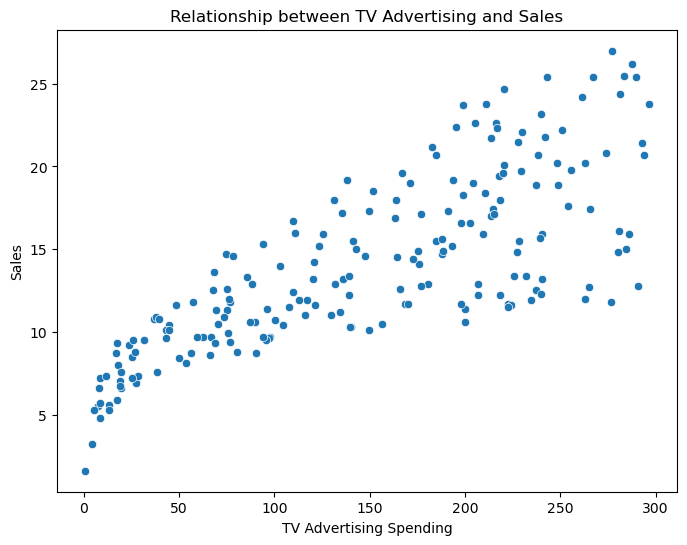

In [11]:
# Explore and visualize relationships
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Scatter plot between 'TV' advertising spending and 'Sales'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.xlabel('TV Advertising Spending')
plt.ylabel('Sales')
plt.title('Relationship between TV Advertising and Sales')
plt.show()

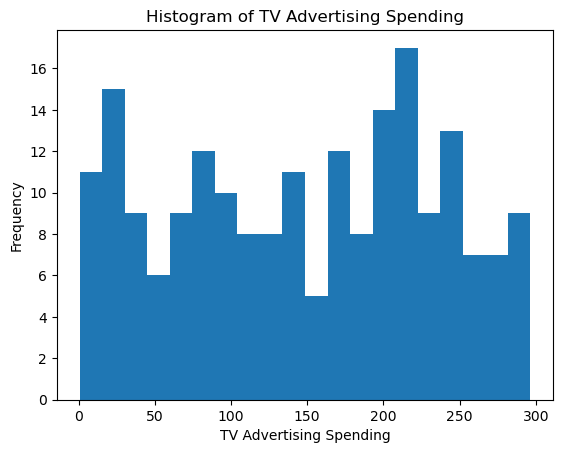

In [12]:
# Example: Histogram for 'TV' advertising spending
plt.hist(df['TV'], bins=20)
plt.xlabel('TV Advertising Spending')
plt.ylabel('Frequency')
plt.title('Histogram of TV Advertising Spending')
plt.show()

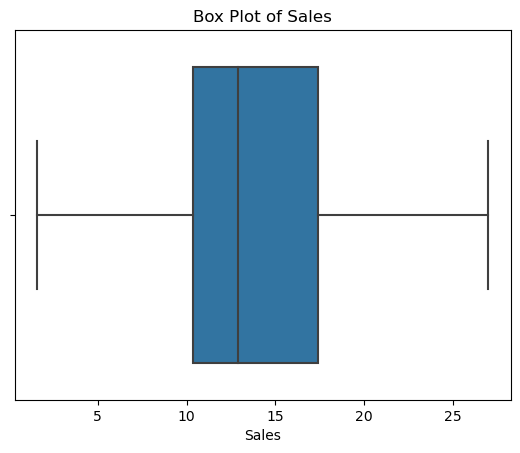

In [13]:
# Example: Box plot for 'Sales'
sns.boxplot(x=df['Sales'])
plt.xlabel('Sales')
plt.title('Box Plot of Sales')
plt.show()

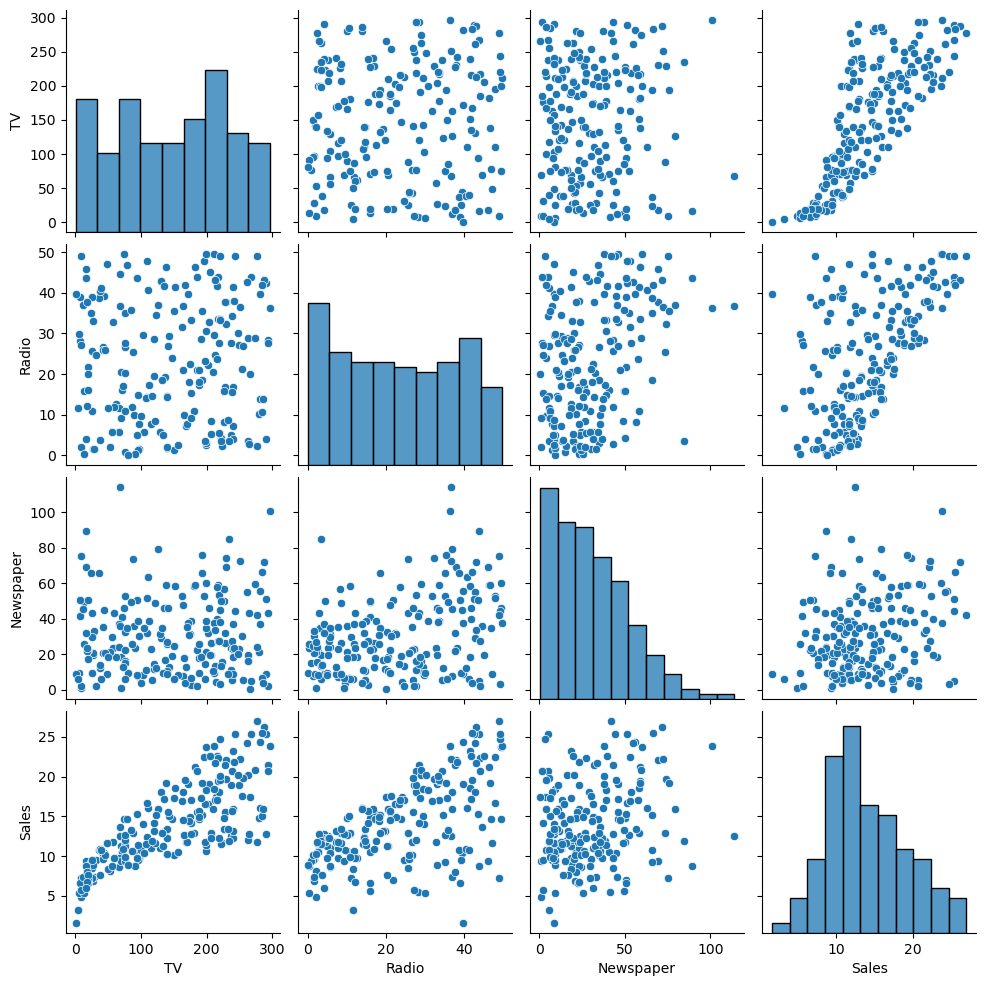

In [14]:
sns.pairplot(df)
plt.show()

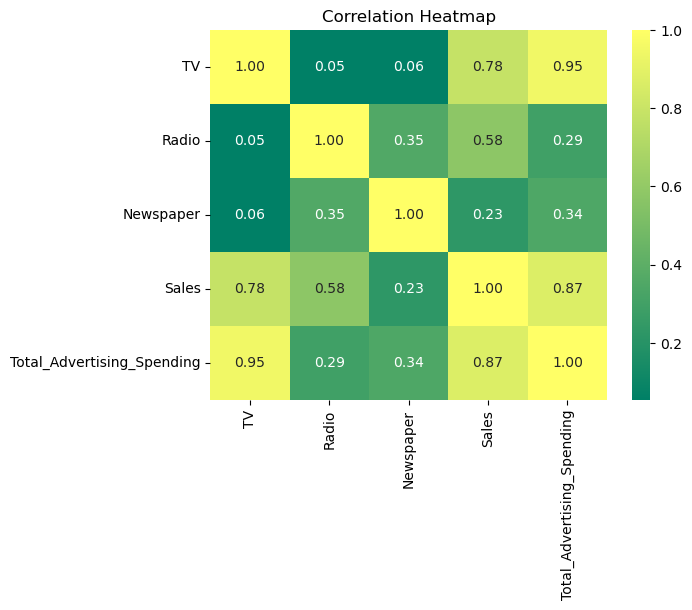

In [33]:
#Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='summer', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [16]:
# You can create new features here if needed.
# Example: Creating a feature 'Total_Advertising_Spending'
df['Total_Advertising_Spending'] = df['TV'] + df['Radio'] + df['Newspaper']

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TV                          200 non-null    float64
 1   Radio                       200 non-null    float64
 2   Newspaper                   200 non-null    float64
 3   Sales                       200 non-null    float64
 4   Total_Advertising_Spending  200 non-null    float64
dtypes: float64(5)
memory usage: 9.4 KB


In [18]:
df.head()

,TV,Radio,Newspaper,Sales,Total_Advertising_Spending
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


## Model Training

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Split the data into training and testing sets
X = df.drop('Sales', axis=1)
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_linear.predict(X_test)

In [22]:
# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.174097353976104
R-squared: 0.899438024100912


## Decision Tree Regressor

In [23]:
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model_tree.predict(X_test)

In [24]:
# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.5800000000000007
R-squared: 0.9499423287311826


## Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train a random forest model
model_forest = RandomForestRegressor(random_state=42)
model_forest.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model_forest.predict(X_test)

In [26]:
# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.2455171750000056
R-squared: 0.9605394371482174


## Support Vector Machine

In [27]:
from sklearn.svm import SVR

# Initialize and train an SVM regression model
model_svm = SVR(kernel='linear')  # You can choose different kernel functions like 'rbf' for non-linear relationships
model_svm.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model_svm.predict(X_test)

In [28]:
# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.6034868868924725
R-squared: 0.8858340746800268


## Predictions

In [29]:
import random

# Step 1: Take random 5 rows from the dataset with columns TV, Radio, Newspaper
random.seed(42)  # Setting a seed for reproducibility
sample_data = df[['TV', 'Radio', 'Newspaper']].sample(5)
sample_data

,TV,Radio,Newspaper
71,109.8,14.3,31.7
113,209.6,20.6,10.7
198,283.6,42.0,66.2
17,281.4,39.6,55.8
91,28.6,1.5,33.0


In [30]:
# Step 2: Add the 'Total_Advertising_Spending' column
sample_data['Total_Advertising_Spending'] = sample_data['TV'] + sample_data['Radio'] + sample_data['Newspaper']
sample_data

,TV,Radio,Newspaper,Total_Advertising_Spending
71,109.8,14.3,31.7,155.8
113,209.6,20.6,10.7,240.9
198,283.6,42.0,66.2,391.8
17,281.4,39.6,55.8,376.8
91,28.6,1.5,33.0,63.1


In [31]:
# Step 3: Make predictions using the five models
linear_predictions = model_linear.predict(sample_data)
tree_predictions = model_tree.predict(sample_data)
forest_predictions = model_forest.predict(sample_data)
svm_predictions = model_svm.predict(sample_data)

In [32]:
# Step 4: Create a table with original value (Sales from sample data) and predictions
sample_data['Original Value'] = df.loc[sample_data.index, 'Sales']

predictions_table = pd.DataFrame({
    'Original Value': sample_data['Original Value'],
    'Linear Regression Prediction': linear_predictions,
    'Decision Tree Prediction': tree_predictions,
    'Random Forest Prediction': forest_predictions,
    'SVM Prediction': svm_predictions
})
# Print the table
predictions_table

,Original Value,Linear Regression Prediction,Decision Tree Prediction,Random Forest Prediction,SVM Prediction
71,12.4,10.683385,12.4,12.090,10.965295
113,15.9,16.281336,15.9,15.985,16.496330
198,25.5,23.793337,25.5,25.301,23.921445
17,24.4,23.212148,24.4,24.033,23.351237
91,7.3,4.633241,7.3,7.450,4.926895
